In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import statsmodels.formula.api as smf

In [2]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [3]:
# Import csv files
daily_composite = pd.read_csv('../Data-Analytics-Final_Project/Resources/daily_composite.csv',index_col=False)
monthly_composite = pd.read_csv('../Data-Analytics-Final_Project/Resources/monthly_composite.csv',index_col=False)

In [4]:
daily_composite.head()

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,date,pA,pB,pD,pC
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,6/2/2001,0.182,NaN,NaN,NaN
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,6/4/2001,0.177,NaN,NaN,NaN
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,6/5/2001,0.195,NaN,NaN,NaN
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,6/6/2001,0.180,NaN,NaN,NaN
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,6/7/2001,0.191,NaN,NaN,NaN


In [5]:
daily_sel = daily_composite[['average_exhaustion','average_sA','average_percent_extracted_per_point','pA']]
monthly_sel = monthly_composite[['average_exhaustion','average_sA','average_percent_extracted_per_point','average_pA']]
model = forward_selected(daily_sel,'pA')
#model = forward_selected(monthly_model,'average_pA')

In [6]:
print (model.model.formula)

pA ~ average_sA + average_exhaustion + average_percent_extracted_per_point + 1


In [7]:
print(model.rsquared_adj)

0.1619445213627334


In [8]:
X = daily_composite[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
y = daily_composite['pA'].values.reshape(-1,1)
print(X.shape,y.shape)

(4633, 3) (4633, 1)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.16346031265921768
Testing Score: 0.15772920491080214


Text(0.5, 1.0, 'Residual Plot')

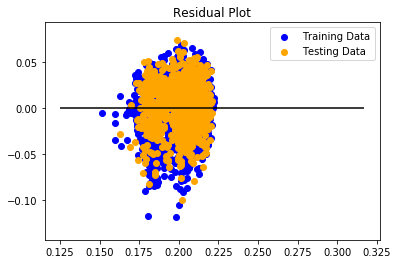

In [12]:
plt.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
plt.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot')

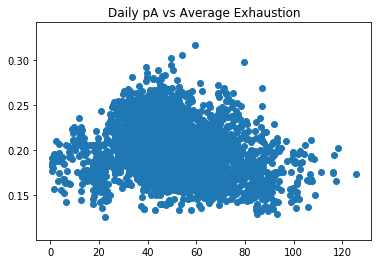

In [13]:
# Look at scatter plots of each independent variable to identify any trends right away
#daily_composite.head()
#monthly_composite.head()
plt.scatter(daily_composite['average_exhaustion'],daily_composite['pA'])
plt.title('Daily pA vs Average Exhaustion')
plt.show()

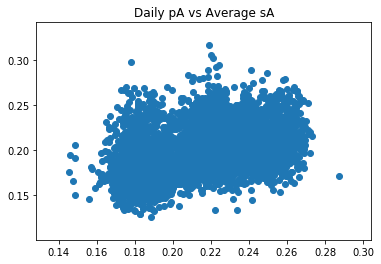

In [14]:
plt.scatter(daily_composite['average_sA'],daily_composite['pA'])
plt.title('Daily pA vs Average sA')
plt.show()

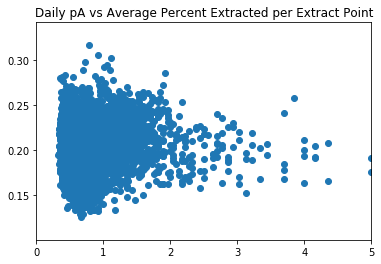

In [15]:
plt.scatter(daily_composite['average_percent_extracted_per_point'],daily_composite['pA'])
plt.title('Daily pA vs Average Percent Extracted per Extract Point')
plt.xlim([0,5])
plt.show()

In [16]:
daily_pB = daily_composite.copy()
daily_pB = daily_pB[['datestring','average_exhaustion','average_sA','average_percent_extracted_per_point','pB']].dropna()
daily_pB

,datestring,average_exhaustion,average_sA,average_percent_extracted_per_point,pB
2265,20090812,47.836660,0.236600,0.675676,1.556000
2266,20090813,45.127344,0.239869,0.709220,1.324000
2267,20090814,46.250910,0.237382,0.649351,1.545000
2268,20090815,47.276493,0.238790,0.657895,1.512000
2269,20090816,45.022368,0.240766,0.617284,1.077000
...,...,...,...,...,...
4628,20200320,91.697606,0.189014,0.666667,2.459333
4629,20200323,92.262835,0.183232,0.613497,2.603000
4630,20200324,91.541995,0.187317,0.564972,2.641500
4631,20200325,80.328178,0.193251,0.574713,2.673500


In [17]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [18]:
variables_used = 'Exhaustion, sA, Extracted per Point'
num_variables = 3
XB = daily_pB[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
yB = daily_pB['pB'].values.reshape(-1,1)
print(XB.shape,yB.shape)
XB_train, XB_test, yB_train, yB_test = train_test_split(XB,yB,random_state = 42)
modelB = LinearRegression()
modelB.fit(XB_train,yB_train)
training_scoreB = modelB.score(XB_train,yB_train)
testing_scoreB = modelB.score(XB_test,yB_test)
print(variables_used)
print(f'Training Score: {training_scoreB}')
print(f'Testing Score: {testing_scoreB}')
predictedB = modelB.predict(XB)
SS_ResidualB = sum((yB-predictedB)**2)       
SS_TotalB = sum((yB-np.mean(yB))**2)     
r_squaredB = 1 - (float(SS_ResidualB))/SS_TotalB
adjusted_r_squaredB = 1 - (1-r_squaredB)*(len(yB)-1)/(len(yB)-XB.shape[1]-1)
print(f'R2 Value: {r_squaredB}')
print(f'Adjusted R2 value: {adjusted_r_squaredB}, note the difference is negligible due to the large number of data points vs variables')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(yB,predictedB)}')
coeffsB = modelB.fit(XB,yB).coef_
interceptB = modelB.fit(XB,yB).intercept_
print(coeffsB)
print(interceptB)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(modelB.score(XB,yB))
mse_list.append(mean_squared_error(yB,predictedB))

(2334, 3) (2334, 1)
Exhaustion, sA, Extracted per Point
Training Score: 0.6081264007063552
Testing Score: 0.6049131939192928
R2 Value: [0.6077443]
Adjusted R2 value: [0.60723925], note the difference is negligible due to the large number of data points vs variables
MSE: 0.10107213649360866
[[ 0.02038988 -2.57980183  0.02587712]]
[0.95813273]


In [19]:
variables_used = 'Exhaustion'
num_variables = 1
X = daily_pB[['average_exhaustion']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 1) (2334, 1)
Exhaustion
Training Score: 0.6025359400924178
Testing Score: 0.5984842939660653
MSE: 0.1025609788867459


In [20]:
variables_used = 'sA'
num_variables = 1
X = daily_pB[['average_sA']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
predicted = model.predict(X)
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 1) (2334, 1)
sA
Training Score: 0.2676471682623147
MSE: 0.18738952393260272


In [21]:
variables_used = 'Extracted per Point'
num_variables = 1
X = daily_pB[['average_percent_extracted_per_point']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
predicted = model.predict(X)
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 1) (2334, 1)
Extracted per Point
Training Score: 0.0789483792127601
MSE: 0.2396730893483286


In [22]:
variables_used = 'Exhaustion, sA'
num_variables = 2
X = daily_pB[['average_exhaustion','average_sA']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 2) (2334, 1)
Exhaustion, sA
Training Score: 0.6076181880726349
Testing Score: 0.6072186565993132


In [23]:
variables_used = 'Exhaustion, Extracted per Point'
num_variables = 2
X = daily_pB[['average_exhaustion','average_percent_extracted_per_point']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 2) (2334, 1)
Exhaustion, Extracted per Point
Training Score: 0.6051969556509709
Testing Score: 0.5959630385543149


In [24]:
variables_used = 'sA, Extracted per Point'
num_variables = 2
X = daily_pB[['average_sA','average_percent_extracted_per_point']]
y = daily_pB['pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(2334, 2) (2334, 1)
sA, Extracted per Point
Training Score: 0.26793831739610874
Testing Score: 0.28571896764606886


In [25]:
pB_reg_results = {'Variables':variables_list,
              'Number of Variables':num_vars_list,
              'Score':score_list,
              'MSE':mse_list}
pB_reg_results_df = pd.DataFrame(pB_reg_results).sort_values('Score',ascending=False)
pB_reg_results_df

,Variables,Number of Variables,Score,MSE
0,"Exhaustion, sA, Extracted per Point",3,0.608213,0.101072
4,"Exhaustion, sA",2,0.607883,0.239673
5,"Exhaustion, Extracted per Point",2,0.603433,0.239673
1,Exhaustion,1,0.601966,0.102561
2,sA,1,0.272751,0.187390
6,"sA, Extracted per Point",2,0.272692,0.239673
3,Extracted per Point,1,0.069841,0.239673


In [26]:
daily_pB.to_csv('Resources/daily_pB.csv',index=False)

From all of the regressions ran above, using the pB as the dependent variable, it proves that using all 3 independent variables will yield the best regression. As the number of variables increases, the Regression Score will inevitably increase as well.

It can also be seen from the table that the increase in Regression Score by adding Extracted per Point to the 2-variable (Exhaustion and sA) is nomimal. Extracted per Point also has the weakest correlation to pB

##### In order to simplify the rest of the regressions, only Exhaustion will be used for pB regression testing. The gain in Score is not enough compared to the simplicity of a single variable regression

Full dataset score: 0.607744295505112


Text(0.5, 1.0, 'Residual Plot, pB, Exhaustion as Independent Variable')

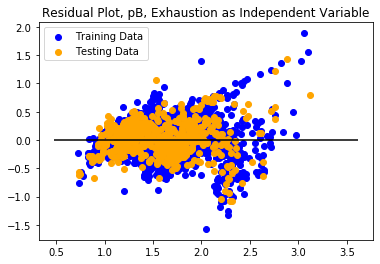

In [39]:
# Plot pB residuals based on 3-variable model
XB = daily_pB[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
yB = daily_pB['pB'].values.reshape(-1,1)
XB_train, XB_test, yB_train, yB_test = train_test_split(XB,yB,random_state = 42)
modelB = LinearRegression()
modelB.fit(XB_train,yB_train)
print("Full dataset score: "+str(modelB.score(XB,yB)))
plt.scatter(modelB.predict(XB_train),modelB.predict(XB_train) - yB_train, c='blue',label='Training Data')
plt.scatter(modelB.predict(XB_test),modelB.predict(XB_test) - yB_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=yB.min(),xmax=yB.max())
plt.title('Residual Plot, pB, Exhaustion as Independent Variable')

Full dataset score: 0.6019661756190361


Text(0.5, 1.0, 'Residual Plot, pB, Exhaustion as Independent Variable')

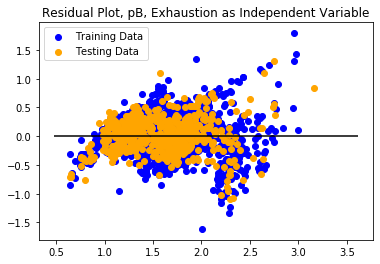

In [40]:
# Plot pB residuals based on exhaustion variable
XB = daily_pB[['average_exhaustion']]
yB = daily_pB['pB'].values.reshape(-1,1)
XB_train, XB_test, yB_train, yB_test = train_test_split(XB,yB,random_state = 42)
modelB = LinearRegression()
modelB.fit(XB_train,yB_train)
print("Full dataset score: "+str(modelB.score(XB,yB)))
plt.scatter(modelB.predict(XB_train),modelB.predict(XB_train) - yB_train, c='blue',label='Training Data')
plt.scatter(modelB.predict(XB_test),modelB.predict(XB_test) - yB_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=yB.min(),xmax=yB.max())
plt.title('Residual Plot, pB, Exhaustion as Independent Variable')

No apparent trends, centered over 0 for residuals

In [31]:
# Regression analysis on pC
daily_pC = daily_composite.copy()
daily_pC = daily_pC[['datestring','average_exhaustion','average_sA','average_percent_extracted_per_point','pC']].dropna()
daily_pC

,datestring,average_exhaustion,average_sA,average_percent_extracted_per_point,pC
4163,20170823,43.194169,0.185240,0.900901,0.001333
4164,20170824,43.655595,0.188209,0.689655,0.002000
4166,20170828,42.783531,0.189823,0.666667,0.001333
4167,20170829,43.937784,0.189681,0.735294,0.001000
4169,20170905,44.898303,0.193390,0.671141,0.001000
...,...,...,...,...,...
4628,20200320,91.697606,0.189014,0.666667,0.001925
4629,20200323,92.262835,0.183232,0.613497,0.001800
4630,20200324,91.541995,0.187317,0.564972,0.001933
4631,20200325,80.328178,0.193251,0.574713,0.001800


In [32]:
XC = daily_pC[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
yC = daily_pC['pC'].values.reshape(-1,1)
print(XC.shape,yC.shape)
XC_train, XC_test, yC_train, yC_test = train_test_split(XC,yC,random_state = 42)
modelC = LinearRegression()
modelC.fit(XC_train,yC_train)
training_scoreC = modelC.score(XC_train,yC_train)
testing_scoreC = modelC.score(XC_test,yC_test)
print(f'Training Score: {training_scoreC}')
print(f'Testing Score: {testing_scoreC}')
predictedC = modelC.predict(XC)
SS_ResidualC = sum((yC-predictedC)**2)       
SS_TotalC = sum((yC-np.mean(yC))**2)     
r_squaredC = 1 - (float(SS_ResidualC))/SS_TotalC
adjusted_r_squaredC = 1 - (1-r_squaredC)*(len(yC)-1)/(len(yC)-XC.shape[1]-1)
print(f'R2 Value: {r_squaredC}')
print(f'Adjusted R2 value: {adjusted_r_squaredC}')
print(f'MSE: {mean_squared_error(yC,predictedC)}')
coeffsC = modelC.fit(XC,yC).coef_
interceptC = modelC.fit(XC,yC).intercept_
print(coeffsC)
print(interceptC)

(455, 3) (455, 1)
Training Score: 0.11212959301752434
Testing Score: 0.10514695414230102
R2 Value: [0.11947862]
Adjusted R2 value: [0.11362149]
MSE: 1.634186189653929e-07
[[ 8.58849146e-06 -2.14016236e-03 -4.43009127e-04]]
[0.00220359]


Text(0.5, 1.0, 'Residual Plot, pC, 3-Variable Regression')

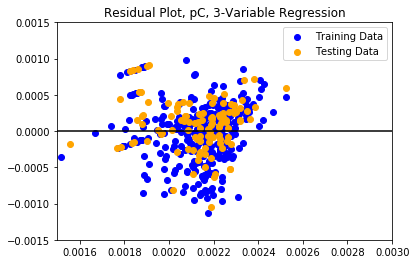

In [33]:
# Plot pC residuals based on 3-variable model
plt.scatter(modelC.predict(XC_train),modelC.predict(XC_train) - yC_train, c='blue',label='Training Data')
plt.scatter(modelC.predict(XC_test),modelC.predict(XC_test) - yC_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=yC.min(),xmax=yC.max())
plt.xlim([0.0015,0.0030])
plt.ylim([-0.0015,0.0015])
plt.title('Residual Plot, pC, 3-Variable Regression')

Not a great residual plot, however the Score was only ~ 0.11

In [34]:
# Regression analysis on pD
daily_pD = daily_composite.copy()
daily_pD = daily_pD[['datestring','average_exhaustion','average_sA','average_percent_extracted_per_point','pD']].dropna()
daily_pD

,datestring,average_exhaustion,average_sA,average_percent_extracted_per_point,pD
2265,20090812,47.836660,0.236600,0.675676,0.017000
2266,20090813,45.127344,0.239869,0.709220,0.021000
2267,20090814,46.250910,0.237382,0.649351,0.016000
2268,20090815,47.276493,0.238790,0.657895,0.019000
2270,20090817,44.291179,0.236525,0.657895,0.025000
...,...,...,...,...,...
4628,20200320,91.697606,0.189014,0.666667,0.009750
4629,20200323,92.262835,0.183232,0.613497,0.012000
4630,20200324,91.541995,0.187317,0.564972,0.011667
4631,20200325,80.328178,0.193251,0.574713,0.012333
